# Matplotlib 3D Plot Advanced

If you've already learned how to make [basic 3d plots in maptlotlib](https://blog.finxter.com/matplotlib-3d-plot/) and want to take them to the next level, then look no further. In this article, I'll teach you how to create the two most common 3D plots (surface and wireframe plots) and a step-by-step method you can use to create any shape you can imagine.

In addition to `import matplotlib.pyplot as plt` and calling `plt.show()`, to create a 3D plot in matplotlib, you need to: 

1. Import the `Axes3D` object
2. Initialize your `Figure` and `Axes3D` object
3. Get some 3D data
4. Plot it using `Axes` notation 

Here's a wireframe plot:

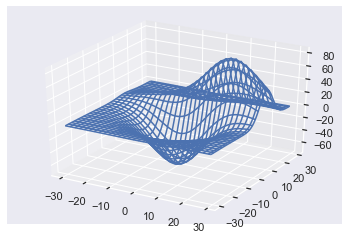

In [8]:
# Standard import
import matplotlib.pyplot as plt

# Import 3D Axes
from mpl_toolkits.mplot3d import axes3d

# Set up Figure and 3D Axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Get some data
X, Y, Z = axes3d.get_test_data(0.1)

# Plot using Axes notation
ax.plot_wireframe(X, Y, Z)
plt.show()

Changing the plot call to `ax.plot_surface(X, Y, Z)` gives

<div>
    <img src="surface.png" width=400 align="left" />
</div>

Great! You've just created your first 3D wireframe and surface plots. Don't worry if that was a bit fast; let's dive into a more detailed example.

But first, note that your plots may look different to mine because I use the seaborn style throughout. You can set this by installing the seaborn library and calling the set function at the top of your code.

```python
import seaborn as sns; sns.set()
```

## Matplotlib 3D Plot Example

The four steps needed to create advanced 3D plots are the same as those needed to create basic ones. If you don't understand those steps, check out my article on how to make [basic 3D plots](https://blog.finxter.com/matplotlib-3d-plot/) first. 

The most difficult part of creating surface and wireframe plots is step 3: getting 3D data. Matplotlib actually includes a helper function `axes3d.get_test_data()` to generate some data for you. It accepts a float and, for best results, choose a value between 0 and 1. It always produces the same plot, but different floats give you different sized data and thus impact how detailed the plot is.

However, the best way to learn 3D plotting is to create custom plots.

At the end of step 3, you want to have three numpy arrays `X`, `Y` and `Z`, which you will pass to `ax.plot_wireframe()` or `ax.plot_surface()`. You can break step 3 down into four steps:

1. Define the x-axis and y-axis limits
2. Create a grid of XY-points (to get X and Y)
3. Define a z-function
4. Apply the z-function to X and Y (to get Z)

In matplotlib, the z-axis is vertical by default. So, the 'bottom' of the `Axes3D` object is a grid of XY points. For surface or wireframe plots, each pair of XY points has a corresponding Z value. So, we can think of surface/wireframe plots as the result of applying some z-function to every XY-pair on the 'bottom' of the `Axes3D` object. 

Since there are infinitely many numbers on the XY-plane, it is not possible to map every one to a Z-value. You just need an amount large enough to deceive humans - anything above 50 pairs usually works well.

To create your XY-points, you first need to define the x-axis and y-axis limits. Let's say you want X-values ranging from -5 to +5 and Y-values from -2 to +2. You can create an array of numbers for each of these using the [`np.linspace()`](https://blog.finxter.com/np-linspace/) function. For reasons that will become clear later, I will make `x` have 100 points, and `y` have 70. 

In [12]:
x = np.linspace(-5, 5, num=100)
y = np.linspace(-2, 2, num=70)

Both `x` and `y` are 1D arrays containing `num` equally spaced floats in the ranges `[-5, 5]` and `[-2, 2]` respectively. 

Since the XY-plane is a 2D object, you now need to create a rectangular grid of all xy-pairs. To do this, use the numpy function [`np.meshgrid()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html). It takes `n` 1D arrays and turns them into an N-dimensional grid. In this case, it takes two 1D arrays and turns them into a 2D grid. 

In [3]:
X, Y = np.meshgrid(x, y)

Now you've created `X` and `Y`, so let's inspect them.

In [4]:
print(f'Type of X: {type(X)}')
print(f'Shape of X: {X.shape}\n')
print(f'Type of Y: {type(Y)}')
print(f'Shape of Y: {Y.shape}')

Type of X: <class 'numpy.ndarray'>
Shape of X: (70, 100)

Type of Y: <class 'numpy.ndarray'>
Shape of Y: (70, 100)


Both `X` and `Y` are numpy arrays of the same shape: `(70, 100)`. This corresponds to the size of `y` and `x` respectively. As you would expect, the size of `y` dictates the height of the array, i.e., the number of rows and the size of `x` dictates the width, i.e., the number of columns.

Note that I used lowercase `x` and `y` for the 1D arrays and uppercase `X` and `Y` for the 2D arrays. This is standard practice when making 3D plots, and I use it throughout the article. 

Now you've created your grid of points; it's time to define a function to apply to them all. Since this function outputs z-values, I call it a z-function. [Common z-functions](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html) contain `np.sin()` and `np.cos()` because they create repeating, cyclical patterns that look interesting when plotted in 3D. Additionally, z-functions usually combine both `X` and `Y` variables as 3D plots look at how all the variables interact. 

In [13]:
# Define z-function with 2 arguments: x and y
def z_func(x, y):
    return np.sin(np.cos(x) + y)

# Apply to X and Y
Z = z_func(X, Y)

Here I defined a z-function that accepts 2 variables - `x` and `y` - and is a combination of `np.sin()` and `np.cos()` functions. Then I applied it to `X` and `Y` to get the `Z` array. Thanks to [numpy broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html), python applies the z-function to every  XY pair almost instantly and saves you from having to write a wildly inefficient `for` loop.

Note that `Z` is the same shape and type as both `X` and `Y`. 

In [8]:
print(f'Type of Z: {type(Z)}')
print(f'Shape of Z: {Z.shape}')

Type of Z: <class 'numpy.ndarray'>
Shape of Z: (70, 100)


Now that you have got your data, all that is left to do is make the plots. Let's put all the above code together:

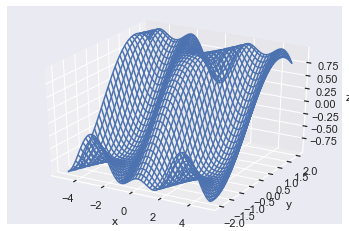

In [17]:
# Set up Figure and 3D Axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create x and y 1D arrays
x = np.linspace(-5, 5, num=100)
y = np.linspace(-2, 2, num=70)

# Create X and Y 2D arrays
X, Y = np.meshgrid(x, y)

# Define Z-function
def z_func(x, y): return np.sin(np.cos(x) + y)

# Create Z 2D array
Z = z_func(X, Y)

# Plot using Axes notation
ax.plot_wireframe(X, Y, Z)
# Set axes lables
ax.set(xlabel='x', ylabel='y', zlabel='z')
plt.show()

Great, I found the above plot by playing around with different z-functions and think it looks pretty cool! Z-functions containing `np.log()`, `np.exp()`, `np.sin()`, `np.cos()` and combinations of `x` and `y` usually lead to interesting plots - I encourage you to experiment yourself.

Now I'll create 3 different z-functions with the same `X` and `Y` as before and create a subplot of them so you can see the differences. 

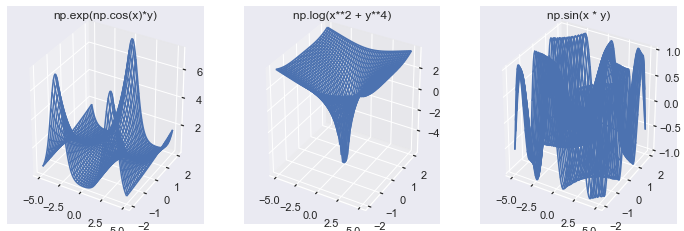

In [20]:
# Set up Figure and Axes
fig, axes = plt.subplots(1, 3, subplot_kw=dict(projection='3d'),
                        figsize=plt.figaspect(1/3))

# Create 3 z-functions
def z_1(x, y): return np.exp(np.cos(x)*y)
def z_2(x, y): return np.log(x**2 + y**4)
def z_3(x, y): return np.sin(x * y)

# Create 3 Z arrays 
Z_arrays = [z_1(X, Y), z_2(X, Y), z_3(X, Y)]
# Titles for the plots
z_func_names = ['np.exp(np.cos(x)*y)', 'np.log(x**2 + y**4)', 'np.sin(x * y)']

# Plot all 3 wireframes
for Z_array, z_name, ax in zip(Z_arrays, z_func_names, axes):
    ax.plot_wireframe(X, Y, Z_array)
    ax.set(title=z_name)
plt.show()

I think all of these images demonstrate the power of 3D plotting, and I hope they have encouraged you to create your own.

Now you know how to create any surface or wireframe plot with your data. But so far, you have only used the default settings. Let's modify them using the available keyword arguments. 

## Matplotlib 3D Plot Wireframe

To make a wireframe plot, call `ax.plot_wireframe(X, Y, Z)`. These plots give you an overview of the surface. Plus, you can see through them to more easily identify peaks and troughs that may otherwise be hidden. 

A wireframe plot works by only plotting a sample of the data passed to it. You can modify how large the samples are with 4 keyword arguments:

1. `rstride` and `cstride`, or
2. `rcount` and `ccount`

The `r` and `c` stand for `row` and `column` respectively. The difference between them is similar to the difference between [`np.arange()`](https://blog.finxter.com/numpy-arange/) and [`np.linspace()`](https://blog.finxter.com/np-linspace/). 

The `stride` arguments default to 1 and set the step sizes between each sampled point. A stride of 1 means that every value is chosen, and a stride of 10 means that every 10th value is chosen. In this way, it is similar to `np.arange()` where you select the step size. A larger stride means fewer values are chosen, so your plot renders faster and is less detailed.

The `count` arguments default to 50 and set the number of (equally spaced) rows/columns sampled. A count of 1 means you use 1 row/column, and a count of 100 means you use 100. In this way, it is similar to `np.linspace()` where you select the total number of values with the `num` keyword argument. A larger count means more values are chosen, so your plot renders slower and is more detailed. 

The [matplotlib docs](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#wireframe-plots) say that you should use the `count` arguments. However, both are still available, and it doesn't look like the `stride` arguments will be depreciated any time soon. Note, though, that you cannot use both `count` and `stride`, and if you try to do so, it's a `ValueError`.

By setting any of the keyword arguments to 0, you do not sample data along that axis. The result is then a 3D line plot rather than a wireframe. 

To demonstrate the differences between different counts or strides, I'll create a [subplot](https://blog.finxter.com/matplotlib-subplots/) with the same `X`, `Y` and `Z` arrays as the first example but with different `stride` and `count` values.

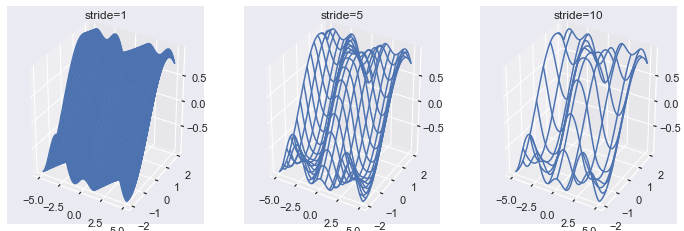

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=3, subplot_kw=dict(projection='3d'),
                         figsize=plt.figaspect(1/3))
# Same as first example
x = np.linspace(-5, 5, num=100)
y = np.linspace(-2, 2, num=70)
X, Y = np.meshgrid(x, y)

def z_func(x, y): return np.sin(np.cos(x) + y)
Z = z_func(X, Y)

# Define different strides
strides = [1, 5, 10]

for stride, ax in zip(strides, axes.flat):
    ax.plot_wireframe(X, Y, Z, rstride=stride, cstride=stride)
    ax.set(title=f'stride={stride}')

plt.show()    

Here you can see that a larger stride produces a less detailed wireframe plot. Note that `stride=1` is the default and is incredibly detailed for a plot that is supposed to give a general overview of the data.

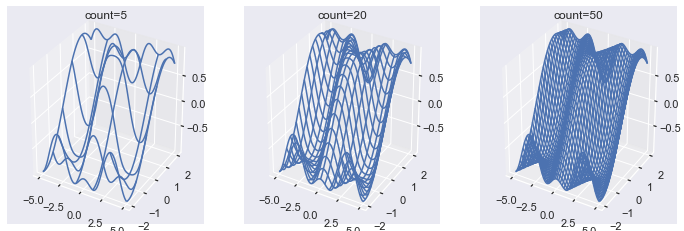

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=3, subplot_kw=dict(projection='3d'),
                         figsize=plt.figaspect(1/3))

counts = [5, 20, 50]

for count, ax in zip(counts, axes.flat):
    # Use same data as the above plots
    ax.plot_wireframe(X, Y, Z, rcount=count, ccount=count)
    ax.set(title=f'count={count}')

plt.show()

Here you can see that a larger count produces a more detailed wireframe plot. Again note that the default `count=50` produces a very detailed plot.

Other keyword arguments are passed to [LineCollection](https://matplotlib.org/api/collections_api.html#matplotlib.collections.LineCollection). So you can also change the [`color` (`c`)](https://blog.finxter.com/matplotlib-line-plot/#Matplotlib_Line_Plot_Color) and [`linestyle` (`ls`)](https://blog.finxter.com/matplotlib-line-plot/#Matplotlib_Linestyle) amongst other things.

## Matplotlib 3D Plot Surface

To make a surface plot call `ax.plot_surface(X, Y, Z)`. Surface plots are the same as wireframe plots, except that spaces in between the lines are colored. Plus, there are some additional keyword arguments you can use, which can add a ton of value to the plot.  

First, let's make the same plots as above with the default surface plot settings and different `rcount` and `ccount` values. 


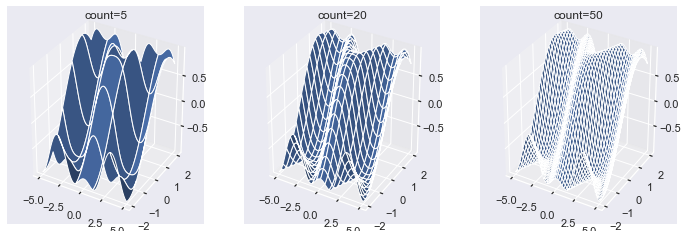

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, subplot_kw=dict(projection='3d'),
                         figsize=plt.figaspect(1/3))

counts = [5, 20, 50]

for count, ax in zip(counts, axes.flat):
    # Use same data as the above plots
    surf = ax.plot_surface(X, Y, Z, rcount=count, ccount=count)
    ax.set(title=f'count={count}')

plt.show()

In contrast to wireframe plots, the space in between each line is filled with the color blue. Note that the plots get whiter as the `count` gets larger. This is because the lines are white, and, as the count increases, there are more lines on each plot. You can modify this by setting the `linewidth` or `lw` argument to a smaller number such, as 0.1 or even 0. 

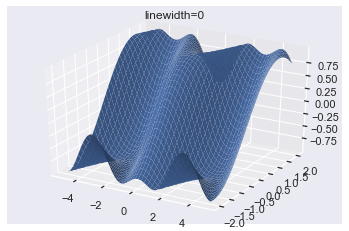

In [31]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, linewidth=0)

ax.set(title="linewidth=0")
plt.show()

Much nicer! Now you can see the color of the plot rather than the color of the lines. It is possible to almost completely remove the lines by setting `antialiased=False`. 

Antialiasing removes noise from data and smooths out images. By turning it off, the surface is less smooth, and so you can't see the lines as easily. 

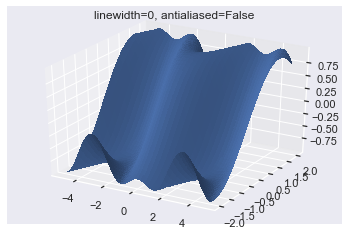

In [30]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, linewidth=0, antialiased=False)

ax.set(title="linewidth=0, antialiased=False")
plt.show()

Now the surface is slightly less smooth, and so you can't see the lines. 

## Maptlotlib 3D  Surface Plot Cmap

Arguably the most crucial keyword argument for surface plots is `cmap` which sets the colormap. When you look at a surface plot from different angles, having a colormap helps you understand which parts of the surface are where. Usually, you want high points to be one color (e.g., orange) and low points to be another (e.g., black). Having two distinct colors is especially helpful if you look at a plot from different angles (which I will show you how to do in a moment).

There are loads of [colormaps in matplotlib](https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html), and you can see several used in my article on the [matplotlib imshow](https://blog.finxter.com/matplotlib-imshow/#Matplotlib_Imshow_Colormap) function. 

Now I'll plot the same data as above but set the colormap to `copper`. 

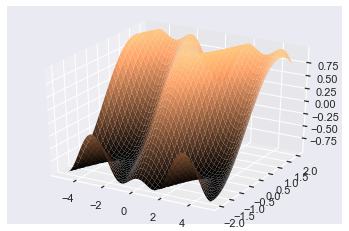

In [32]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, lw=0, cmap='copper')
plt.show()

The colormap `copper` maps large z-values to orange and smaller ones to black. 

Now I'll use 3 different and commonly used colormaps for the same plot to give you an idea of how color can help and (massively) hinder your plots. 

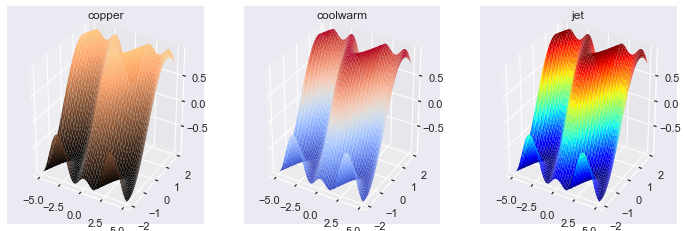

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=3, subplot_kw=dict(projection='3d'),
                         figsize=plt.figaspect(1/3))

cmaps = ['copper', 'coolwarm', 'jet']

for cmap, ax in zip(cmaps, axes):
    ax.plot_surface(X, Y, Z, lw=0, cmap=cmap)
    ax.set(title=f'{cmap}')
plt.show()

The `coolwarm` colormap works well if you want to highlight extremely high and extremely low points. This [non-technical paper](https://cfwebprod.sandia.gov/cfdocs/CompResearch/docs/ColorMapsExpanded.pdf) defines a colormap similar to `coolwarm` and argues it should be the default cmap for all data science work. 

The `jet` colormap is well known and is a terrible choice for all of your plotting needs. It contains so many colors that it is hard for a human to know which corresponds to high, low, or middle points. I included it as an example here but urge you to *never* use it in any of your plots. 

Now let's look at how the `count` and `stride` arguments can affect the color of your surface plots. For brevity, I will just make one subplot demonstrating different `rccount` and `ccount` sizes and leave the reader to experiment with `rstride` and `cstride`.  

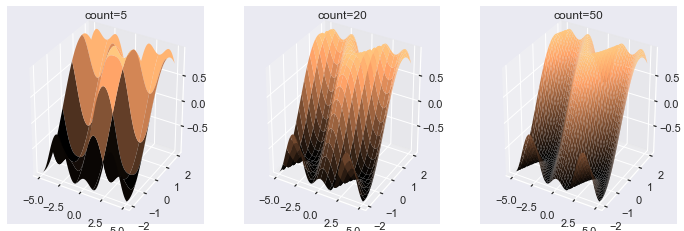

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=3, subplot_kw=dict(projection='3d'),
                         figsize=plt.figaspect(1/3))

counts = [5, 20, 50]

for count, ax in zip(counts, axes.flat):
    # Use same data as the above plots
    ax.plot_surface(X, Y, Z, rcount=count, ccount=count, cmap='copper', lw=0)
    ax.set(title=f'count={count}')
plt.show()

If you pass a lower value to the `count` keyword arguments, there are fewer areas that can be colored. As such, the colors have much more distinct bands when you set the `count` keyword arguments to smaller values. The change in color is much smoother in the plots that have large `count` arguments.

## Matplotlib 3D Plot Colorbar

Adding a colorbar to a 3D surface plot is the same as adding them to other plots.

The simplest method is to save the output of `ax.plot_surface()` in a variable such as `surf` and pass that variable to `plt.colorbar()`. 

Here's an example using the three different colormaps from before.

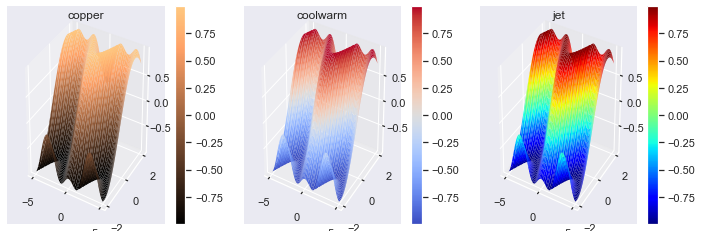

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=3, subplot_kw=dict(projection='3d'),
                         figsize=plt.figaspect(1/3))

cmaps = ['copper', 'coolwarm', 'jet']

for cmap, ax in zip(cmaps, axes):
    # Save surface in a variable: surf
    surf = ax.plot_surface(X, Y, Z, lw=0, cmap=cmap)
    # Plot colorbar on the correct Axes: ax
    fig.colorbar(surf, ax=ax)
    ax.set(title=f'{cmap}')
plt.show()

It's essential to provide a colorbar for any colored plots you create, especially if you use different colormaps. Remember that `colorbar()` is a `Figure` (not `Axes`) method, and you must use the `ax` keyword argument to place it on the correct `Axes`. 

Now, let's see why colormaps are so crucial by rotating the surface plots and viewing them from different angles. 

## Matplotlib 3D Plot View_Init

One way to rotate your plots is by using the magic command `%matplotlib notebook` at the top of your Jupyter notebooks. If you do this, all your plots appear in interactive windows. If instead, you use `%matplotlib inline` (the default settings), you have to rotate your plots using code.

Two attributes that control the rotation of a 3D plot: `ax.elev` and `ax.azim`, which represent the elevation and azimuthal angles of the plot, respectively. 

The elevation is the angle above the XY-plane and the [azimuth](https://en.wikipedia.org/wiki/Azimuth) (don't worry, I hadn't heard of it before either) is the counter-clockwise rotation about the z-axis. Note that they are properties of the `Axes3D` object and so you can happily create subplots where each has a different angle. 

Let's find the default values.

The default elevation angle is: 30
The default azimuth angle is: -60


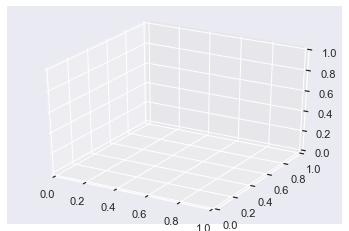

In [58]:
fig = plt.figure()
ax = plt.axes(projection='3d')

print(f'The default elevation angle is: {ax.elev}')
print(f'The default azimuth angle is: {ax.azim}')

You can see that the defaults are 30 and -60 degrees for the elevation and azimuth, respectively. 

You can set them to *any* float you want, and there are two ways to do it:
1. Reassign the `ax.azim` and `ax.elev` attributes, or
2. Use the `ax.view_init(elev, azim)` method

Here's an example with method 1.

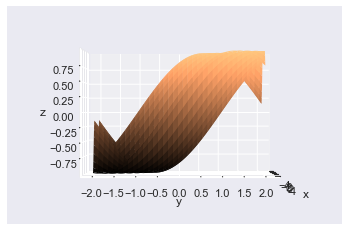

In [62]:
# Same as usual
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, lw=0, cmap='copper')
# Set axis labels so you know what you are looking at
ax.set(xlabel='x', ylabel='y', zlabel='z')

# Reassign rotation angles to 0
ax.azim, ax.elev = 0, 0
plt.show()

Here I set both angles to 0, and you can see the y-axis at the front, the x-axis at the side, and the z-axis as vertical. 

I'll now create the same plot using the `ax.view_init()` method, which accepts two floats: the elevation and azimuth.

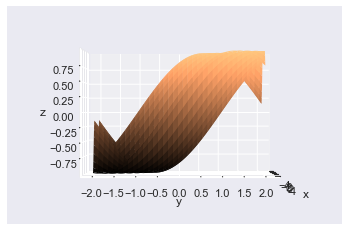

In [70]:
# Same as usual
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, lw=0, cmap='copper')
# Set axis labels so you know what you are looking at
ax.set(xlabel='x', ylabel='y', zlabel='z')

# Reassign rotation angles to 0
ax.view_init(elev=0, azim=0)
plt.show()

Excellent! This plot looks identical to the one above, but I used the `ax.view_init()` method instead. If you just want to change one of the angles, only pass one of the keyword arguments.

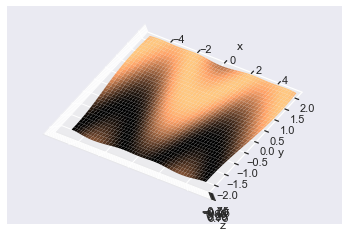

In [22]:
# Same as usual
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, lw=0, cmap='copper')
# Set axis labels so you know what you are looking at
ax.set(xlabel='x', ylabel='y', zlabel='z')

# Set elevation to 90 degrees
ax.view_init(elev=90)
plt.show()

Here I set the elevation to 90 degrees but left the azimuth with its default value. This demonstrates one more reason why colormaps are important: you can infer the shape of the surface from the color (black is low, light is high).

## Conclusion

Now you know how to create the most critical 3D plots: wireframe and surface plots. 

You've learned how to create custom 3D plot datasets using `np.linspace()`, `np.meshgrid()` and z-functions. Plus, you can create them with varying degrees of accuracy by modifying the `count` and `stride` keyword arguments. 

You can make surface plots of any color and colormap and modify them so that the color of the lines doesn't take over the plot. Finally, you can rotate them by setting the `ax.azim` or `ax.elev` attributes to a float of your choice and even use the `ax.view_init()` method to do the same thing. 

Congratulations on mastering these plots! Creating other advanced ones such as contour, tri-surface, and quiver plots for you will be easy. You know all the high-level skills; you just need to go out there and practice.

## Where To Go From Here?

Do you wish you could be a programmer full-time but don’t know how to start?

Check out the pure value-packed webinar where Chris – creator of Finxter.com – teaches you to become a Python freelancer in 60 days or your money back!

https://tinyurl.com/become-a-python-freelancer

It doesn’t matter if you’re a Python novice or Python pro. If you are not making six figures/year with Python right now, you will learn something from this webinar.

These are proven, no-BS methods that get you results fast.

This webinar won’t be online forever. Click the link below before the seats fill up and learn how to become a Python freelancer, guaranteed.

https://tinyurl.com/become-a-python-freelancer